In [ ]:
# Project Tittle:  IRIS FLOWER CLASSIFICATION 
"""
Objective:-
The main objective is to use classification algorithms to accurately predict the species of an Iris Flower
given its measurements. This project teaches the complete data science workflow from data loading to model
deployment.
"""
"""
Project Overview:-
The Iris Flower Classification project focuses on building a machine learning model to classify iris
flowers into three species -- Setosa, Versicolor ,and Virginica --based on four features:
--> Sepal Length(cm)
--> Sepal Width (cm)
--> Petal Length (cm)
--> Petal Width (cm)
"""


In [3]:
# Step1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [5]:
# Step 2: Load the Database:-
df = pd.read_csv(r'C:\Codsoft Project Data Science\Task3\IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# Step3: Basic Datset Information
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
#Step4:  Check for Missing values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
# Step5: Unique Classes in Target
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

C:\Users\Vishal Kumar Sharma\AppData\Local\Temp\ipykernel_20700\800923593.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= 'species', data= df, palette = 'Set2')


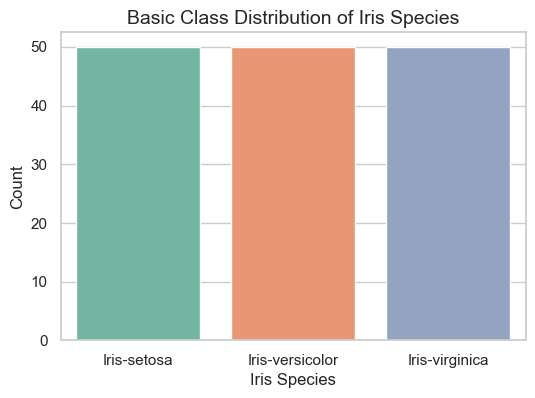

In [10]:
# Step 6: Data Visualization - Class Distribution
""" Set seaborn style"""
sns.set(style= 'whitegrid')
# Basic Count Plot(vertical Bar Chart)
plt.figure(figsize = (6,4))
sns.countplot(x= 'species', data= df, palette = 'Set2')
plt.title('Basic Class Distribution of Iris Species', fontsize= 14)
plt.xlabel('Iris Species', fontsize= 12)
plt.ylabel('Count', fontsize= 12)
plt.show()

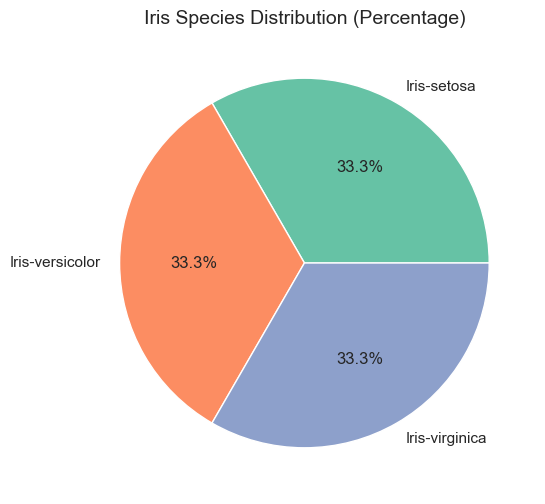

In [13]:
# Pie Chart- Percentage Distribution
plt.figure(figsize= (6,6))
df['species'].value_counts().plot.pie(autopct= '%1.1f%%', colors= sns.color_palette('Set2'))
plt.title('Iris Species Distribution (Percentage)', fontsize= 14)
plt.ylabel('')
plt.show()

C:\Users\Vishal Kumar Sharma\AppData\Local\Temp\ipykernel_20700\2409770863.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='species',data= df, palette= 'pastel')


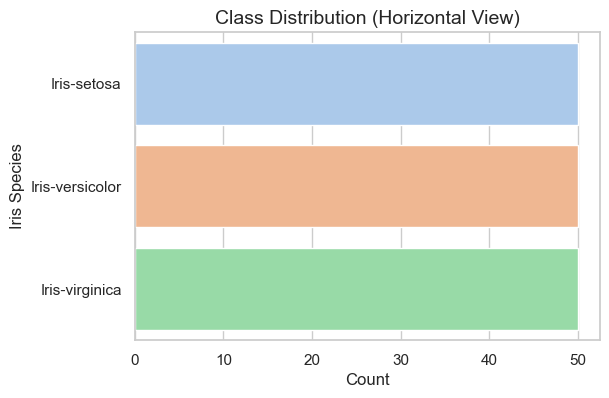

In [14]:
# Horizontal Count Plot
plt.figure(figsize= (6,4))
sns.countplot(y='species',data= df, palette= 'pastel')
plt.title('Class Distribution (Horizontal View)', fontsize= 14)
plt.xlabel('Count', fontsize= 12)
plt.ylabel('Iris Species', fontsize= 12)
plt.show()

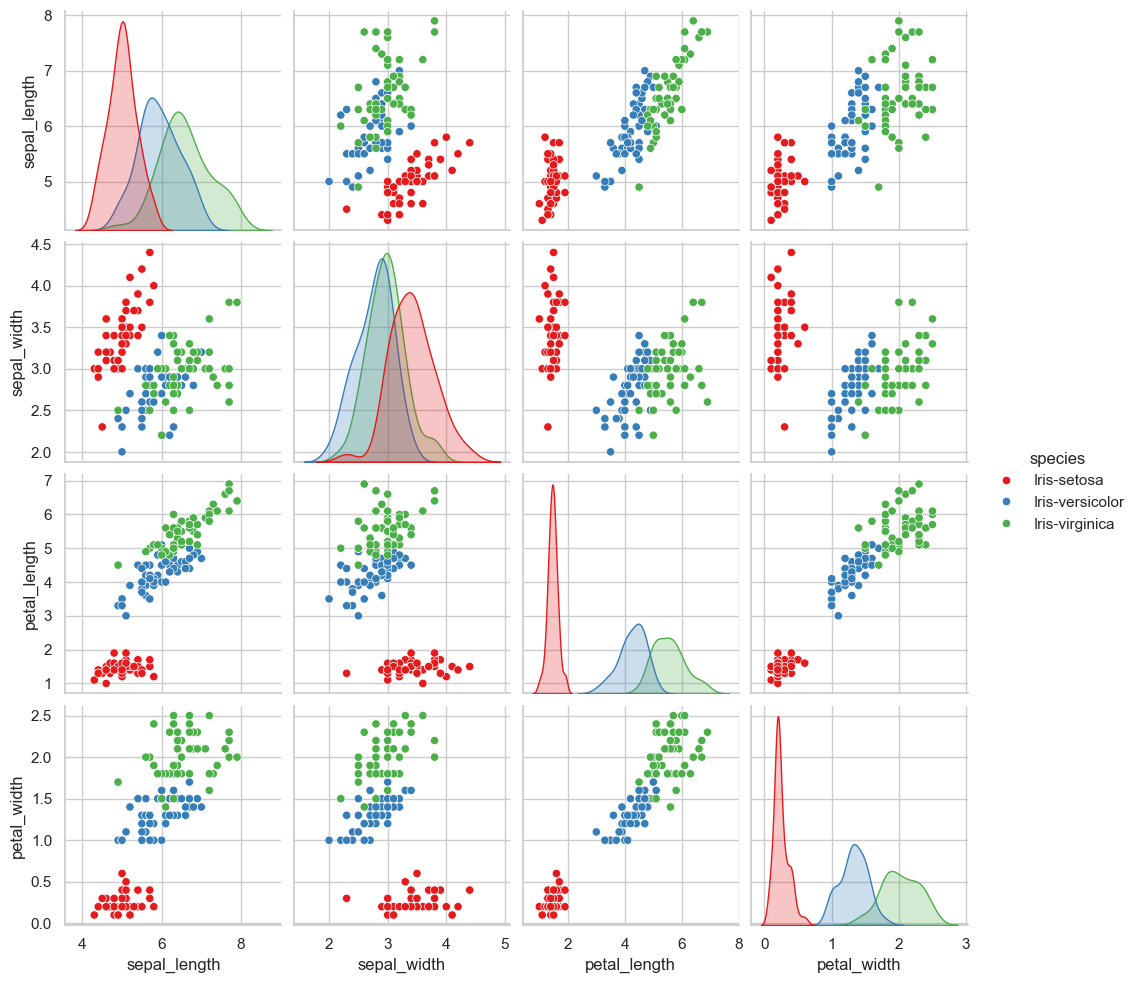

In [15]:
# Step7: pairplot for feature Relationships
sns.pairplot(df, hue= 'species', palette= 'Set1')
plt.show()

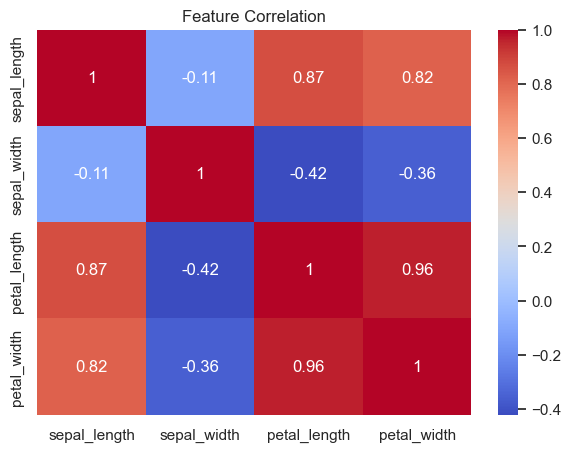

In [16]:
# Step8:- Correlation heatmap
plt.figure(figsize= (7,5))
sns.heatmap(df.drop('species', axis= 1).corr(), annot= True, cmap= 'coolwarm')
plt.title('Feature Correlation')
plt.show()

In [17]:
# Step9: Label Encoding Target
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [18]:
# Step 10 : Split Data into Feature & Target
X = df.drop('species', axis= 1)
y = df['species']


In [20]:
# Step 11: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size= 0.2, random_state= 42, stratify= y)


In [21]:
# Step12: Feature Scaling (standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler. transform(X_test)

In [23]:
# Step13: Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)
print("Logistic Regression Accuracy:",accuracy_score(y_test, y_pred_log))

Logistic Regression Accuracy: 0.9333333333333333


In [24]:
# Step 14: K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))

KNN Accuracy: 0.9333333333333333


In [25]:
# Step15: Support Vector Classifier
svc = SVC(kernel= 'linear')
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
print("SVC Accuracy:", accuracy_score(y_test, y_pred_svc))

SVC Accuracy: 1.0


In [26]:
# Step16: Random Forest
rf = RandomForestClassifier(random_state= 42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.9


In [28]:
# Step17: Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree AccuracyL:", accuracy_score(y_test,y_pred_dt))

Decision Tree AccuracyL: 0.9


In [30]:
# Step 18: Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test,y_pred_nb))

Naive Bayes Accuracy: 0.9666666666666667


C:\Users\Vishal Kumar Sharma\AppData\Local\Temp\ipykernel_20700\100952366.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= models, y= accuracies, palette = 'viridis')


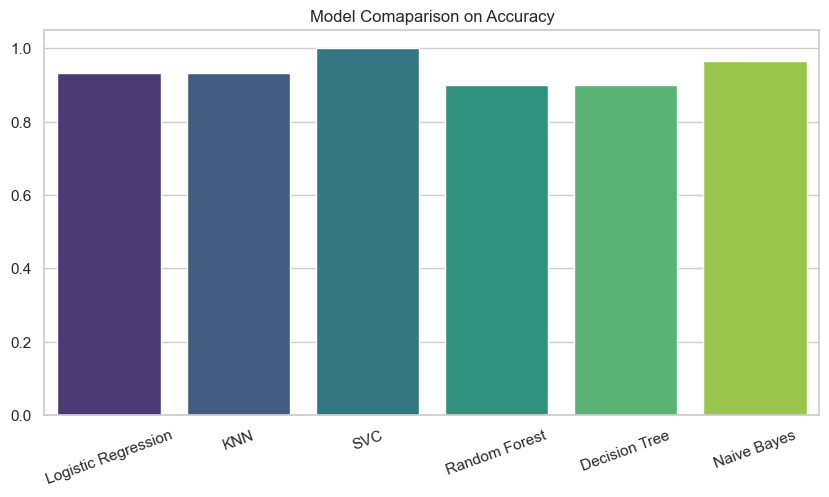

In [34]:
# Step19: Model Comparison Summary 
models =['Logistic Regression', 'KNN', 'SVC', 'Random Forest', 'Decision Tree', 'Naive Bayes']
accuracies = [
    accuracy_score(y_test, y_pred_log),
    accuracy_score(y_test, y_pred_knn),
    accuracy_score(y_test, y_pred_svc),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_nb)
]
plt.figure(figsize = (10,5))
sns.barplot(x= models, y= accuracies, palette = 'viridis')
plt.title("Model Comaparison on Accuracy")
plt.xticks(rotation = 20)
plt.show()

In [36]:
# Step 20: Save Best Model
import pickle
pickle.dump(rf,open('iris_classifier.pkl', 'wb'))
model = pickle.load(open('iris_classifier.pkl', 'rb'))
sample = scaler.transform([[5.1, 3.5, 1.4, 0.2]])
prediction = model.predict(sample)
print("Predicted Class:", le.inverse_transform(prediction)[0])

Predicted Class: Iris-setosa


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
"""
Project Summary: 
This Project builds a supervised classification model using multiple algorithms on the Iris dataset, 
analyzes performance though visualizations, and selects the best-performing model for deployment.
"""


In [ ]:
# Conclusion
"""
--> Iris Flower Classsification is a classic ML problem where Random Forest gives top performance.
--> The dataset is well